In [302]:
#install.packages('BiocManager')
#install.packages('pheatmap')
#install.packages('RColorBrewer')
#install.packages('tidyverse')
#install.packages("devtools") #Also need to install RTools4.0
#install.packages("RColorBrewer")

#library(devtools)
#install_github("cran/lasso2") #Removed from cran

#BiocManager::install("tximportData")
#BiocManager::install("tximport")
#BiocManager::install("DESeq2")
#BiocManager::install("DEGreport")
#BiocManager::install("clusterProfiler")


#BiocManager::install("apeglm")
#BiocManager::install("EnhancedVolcano")

In [303]:
library(tximportData)
library(tximport)
library(DESeq2)
library(tidyverse)
library(DEGreport)
library(pheatmap)
library(RColorBrewer)
library(apeglm)
library(EnhancedVolcano)

In [304]:
## This workflow is build to work off denovo-transcriptome assembly with trinity & quantificaion with salmon
## Transcript id's , must still be in the format of id_cluster#_gene#_isoform#

In [305]:
##Importing metadata will be a slighly individual process.
##The important things to know is to 
##1. we want all cols to be as a factor and not Intergers/flots
##2. We need to make sure we have a column to build a basic model from, i.e. a column that contains the indivial groups
##3. Col 1 needs to be the same was what you ouput salmon folder name is

samples <- read.table(file = "metadata_numerictime.tsv.txt", header = TRUE) ## First we will import our metadata file
samples <- as.data.frame(unclass(samples),stringsAsFactors=TRUE) ## When importing the table we set all string colums to factors
samples$Time <- as.factor(samples$Time) ## If you have a colum that is numbers, you must manuall set it to a factor

# For this experiment we had one treatment factor across time, so we want a column that groups treatment and time
samples$Trt_Time <- paste(samples$Treatment, samples$Time, sep="_") #combines treatment column and time column seperate by _
samples$Trt_Time <- as.factor(samples$Trt_Time) # Setting this new column as a factor
samples ##Inspect your metadata to make sure it looks correct

SampleName,Treatment,Time,Trt_Time
<fct>,<fct>,<fct>,<fct>
C_1_A,Uninfected,1,Uninfected_1
C_1_B,Uninfected,1,Uninfected_1
C_1_C,Uninfected,1,Uninfected_1
C_1_D,Uninfected,1,Uninfected_1
C_1_E,Uninfected,1,Uninfected_1
C_1_F,Uninfected,1,Uninfected_1
C_8_A,Uninfected,8,Uninfected_8
C_8_B,Uninfected,8,Uninfected_8
C_8_C,Uninfected,8,Uninfected_8


In [306]:
############################################
# Need to write a function to do this in R #
############################################

## import the table that converts transcript Id to gene ID
## With trinity transcripts this is easy

# Example

# TXNAME	GENEID
# TRINITY_DN179090_c0_g1_i1	TRINITY_DN179090_c0_g1
# TRINITY_DN179085_c0_g1_i1	TRINITY_DN179085_c0_g1
# TRINITY_DN179048_c0_g1_i1	TRINITY_DN179048_c0_g1

tx2gene <- read.table(file = "gene_2_tx.tsv", header = TRUE) #reading from file

In [307]:
## Importing you salmon data
## In this example we have a folder called salmon_quant filled with the output folders from salmon.
## We pull the name of our folders from samples$SampleName, and the quant files from in the folder is called quant.sf

files <- file.path("salmon_quant", samples$SampleName, "quant.sf") ## creating path to each quant files
names(files) <- samples$SampleName ## associating each quant file with the sample name
txi.salmon <- tximport(files, type = "salmon", tx2gene = tx2gene) ## importing quant data, and converting it to gene level
head(txi.salmon$counts)

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 
43 
44 
45 
46 
47 
48 


summarizing abundance

summarizing counts

summarizing length



,C_1_A,C_1_B,C_1_C,C_1_D,C_1_E,C_1_F,C_8_A,C_8_B,C_8_C,C_8_D,...,V_24_C,V_24_D,V_24_E,V_24_F,V_96_A,V_96_B,V_96_C,V_96_D,V_96_E,V_96_F
TRINITY_DN0_c0_g1,4490.708,3898.111,6816.250,5244.265,5658.865,4545.606,5102.081,5131.738,5683.426,5264.201,...,6451.364,5375.294,6658.806,5705.084,3785.423,3262.685,3030.182,3394.920,3033.362,2928.931
TRINITY_DN0_c0_g2,4.000,6.000,17.000,8.000,10.000,6.000,8.000,22.000,12.000,11.000,...,6.000,11.000,12.000,6.000,3.000,6.000,3.000,4.000,8.000,4.000
TRINITY_DN0_c0_g3,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,2.000,0.000
TRINITY_DN0_c1_g1,73.250,64.943,152.050,124.758,127.939,93.405,453.622,373.047,509.331,431.117,...,219.163,183.695,250.006,195.472,394.395,306.893,265.258,344.766,249.255,263.474
TRINITY_DN0_c10_g1,1388.850,1023.287,1871.033,1460.069,1574.582,1358.728,1479.769,1413.415,1599.582,1450.988,...,1699.625,1406.224,1852.171,1526.316,1613.952,1437.908,1305.970,1533.899,1257.485,1239.962
TRINITY_DN0_c11_g1,5.311,4.000,5.000,2.000,5.000,6.000,6.000,6.000,8.170,11.000,...,9.000,4.000,9.000,4.002,7.000,3.000,4.098,4.000,5.000,6.000


In [308]:
## Create DESeq2Dataset object
## For a general model you design can the your group column
dds <- DESeqDataSetFromTximport(txi.salmon, colData = samples, design = ~ Trt_Time)

using counts and average transcript lengths from tximport



In [309]:
# making sure min size for each group is 3 & filtering our low cout trasncripts (defualt = 10)
smallestGroupSize <- 3
keep <- rowSums(counts(dds) >= 10) >= smallestGroupSize
dds <- dds[keep,]

In [310]:
### Transform counts for data visualization
rld <- rlog(dds, blind=TRUE)

rlog() may take a few minutes with 30 or more samples,
vst() is a much faster transformation

using 'avgTxLength' from assays(dds), correcting for library size



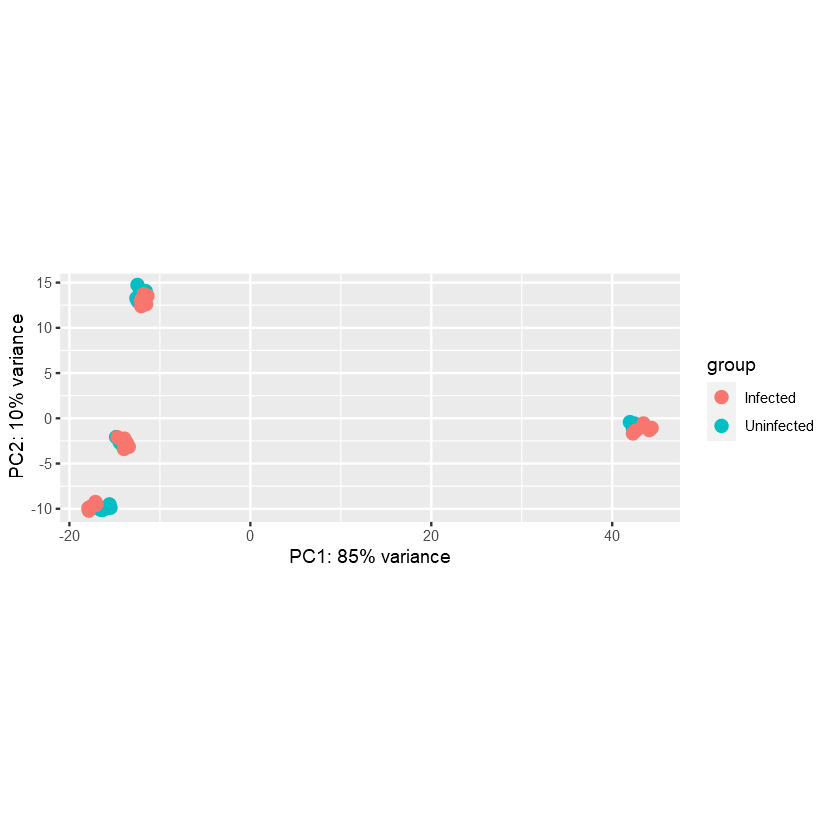

In [311]:
### Plot PCA 
plotPCA(rld, intgroup="Treatment")

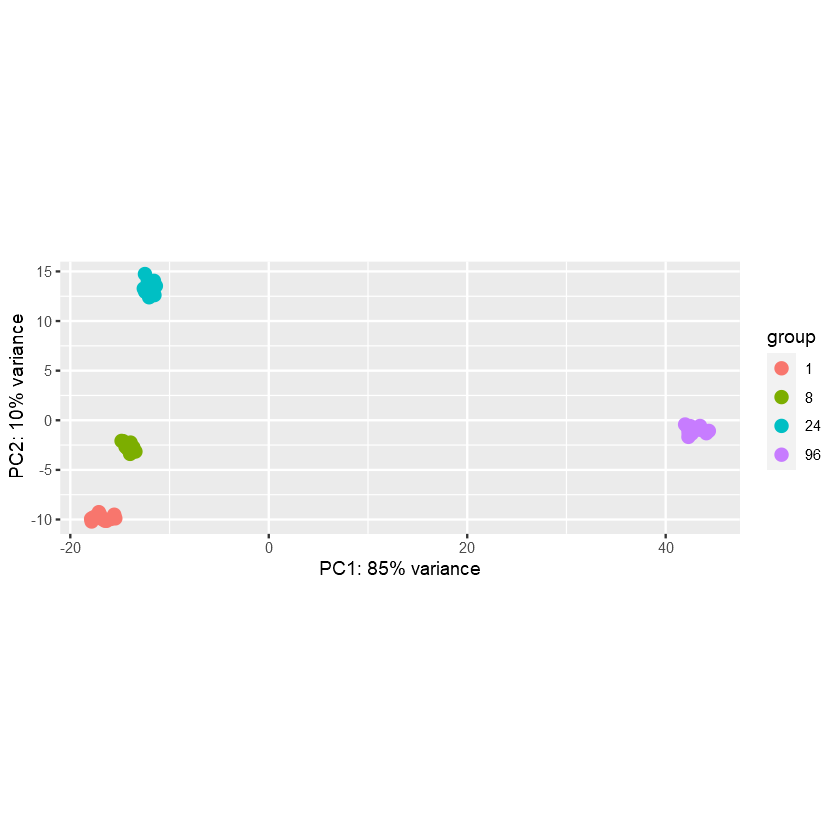

In [312]:
### Plot PCA 
plotPCA(rld, intgroup="Time")

In [313]:
# Getting rlog and generating principle comps
# Input is a matrix of log transformed values
rld <- rlog(dds, blind=T)
rld_mat <- assay(rld)
pca <- prcomp(t(rld_mat))

rlog() may take a few minutes with 30 or more samples,
vst() is a much faster transformation

using 'avgTxLength' from assays(dds), correcting for library size



In [314]:
# Create data frame with metadata and PC values for input to ggplot
# creating a dataframe that comtains our PC's and metadata
df_pca <- cbind(samples, pca$x)
df_pca

,SampleName,Treatment,Time,Trt_Time,PC1,PC2,PC3,PC4,PC5,PC6,...,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C_1_A,C_1_A,Uninfected,1,Uninfected_1,-24.67101,-24.629929,11.1048524,10.246995448,-2.5840922,5.10230959,...,0.19370919,2.9510185,-3.181220267,-1.649944294,0.9405385160,0.49887761,-0.7212307693,1.240392028,-0.08022214,-4.835715e-14
C_1_B,C_1_B,Uninfected,1,Uninfected_1,-24.75546,-23.546328,10.3344819,12.590544560,-2.7189218,2.34045720,...,1.31152937,1.1764998,-0.150227762,-0.064346552,1.8765336135,0.70993818,-2.2060524661,2.273259665,-0.42601981,-4.957146e-14
C_1_C,C_1_C,Uninfected,1,Uninfected_1,-25.95573,-23.976870,11.5115777,10.116929526,-0.3393671,-2.14532676,...,0.46172438,-0.7456607,3.449541408,1.268275764,-2.5463024633,0.51790930,9.4018873760,-9.492212054,2.51851852,-4.852369e-14
C_1_D,C_1_D,Uninfected,1,Uninfected_1,-26.07254,-24.492077,10.8392393,10.456734599,0.6993241,-0.43024339,...,2.87665411,-0.6994157,-0.822148747,-2.218547059,-0.6884160783,0.02547829,-1.3280053075,2.345615858,-0.60000229,-4.904410e-14
C_1_E,C_1_E,Uninfected,1,Uninfected_1,-25.20643,-24.039183,10.5867158,13.339129837,6.3694888,0.03468728,...,-1.06368934,-0.9781647,1.427641992,1.743885778,2.5995013518,-0.74586954,-3.5104960906,1.149724091,-0.52212330,-5.404011e-14
C_1_F,C_1_F,Uninfected,1,Uninfected_1,-23.90075,-23.110624,10.5283844,13.405773390,2.0205340,-0.60803812,...,-1.03787136,-1.7465982,0.331285230,0.348613313,-1.8567680970,-1.13624502,-0.0255159802,1.441894706,-0.44487358,-4.680284e-14
C_8_A,C_8_A,Uninfected,8,Uninfected_8,-21.98943,-8.429748,-21.2914623,-0.817552221,-3.9324438,-1.65532429,...,1.38727829,-7.4325652,-0.014466832,3.519755301,10.3278472189,3.78536413,-0.6885760854,-0.072676748,-1.33974069,-4.675427e-14
C_8_B,C_8_B,Uninfected,8,Uninfected_8,-21.95842,-10.054673,-20.1697318,-0.631710335,-5.9527595,1.46385025,...,1.53172393,5.1296649,-1.476166206,-0.003607904,0.3468607039,0.07763285,-2.4201260403,-1.725756904,0.64242187,-5.118822e-14
C_8_C,C_8_C,Uninfected,8,Uninfected_8,-22.91528,-7.479547,-21.7970724,0.217334097,-10.3209128,-5.42158559,...,-0.36917454,-0.1046298,0.623642412,-1.598455338,-3.9356885366,3.58490766,6.0715805840,11.068015237,4.39892491,-5.330111e-14


[1] "dir exists"
[1] "dir exists"


png 
  2

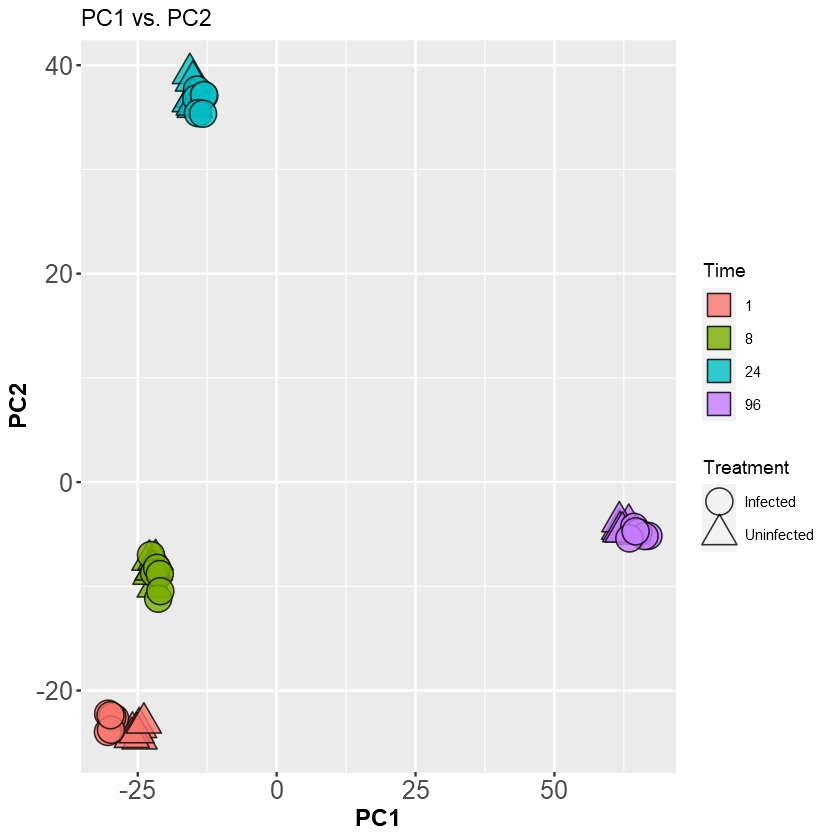

png 
  2

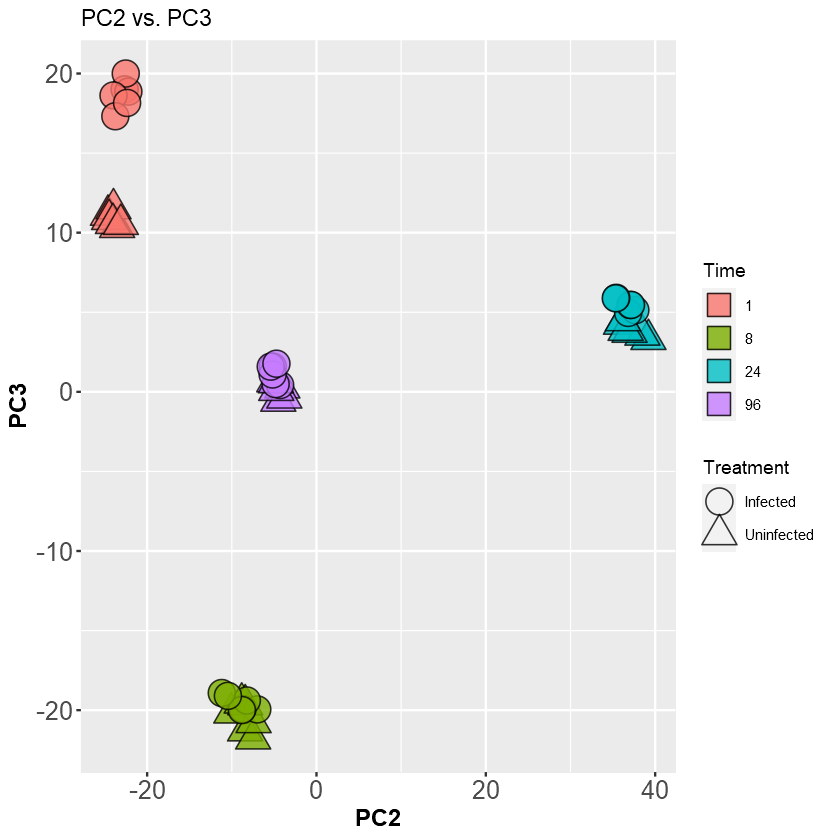

png 
  2

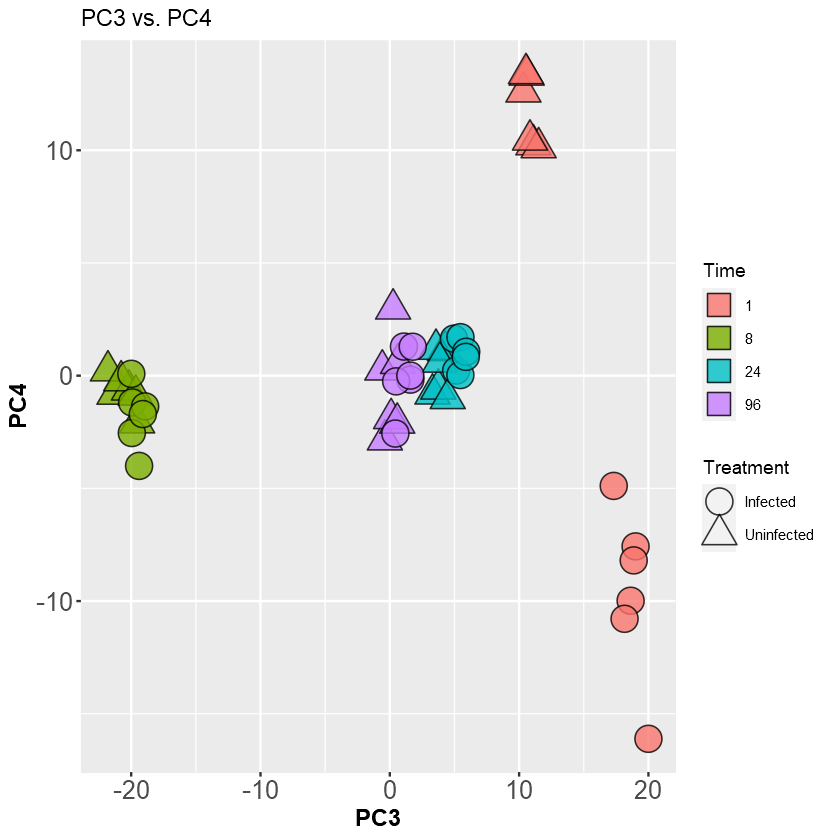

png 
  2

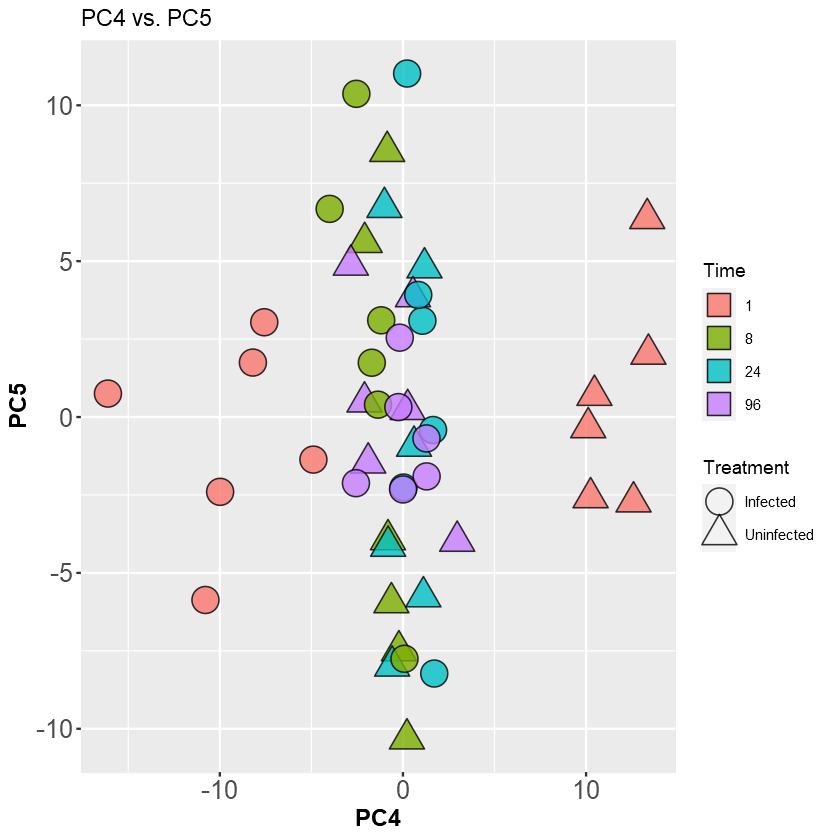

png 
  2

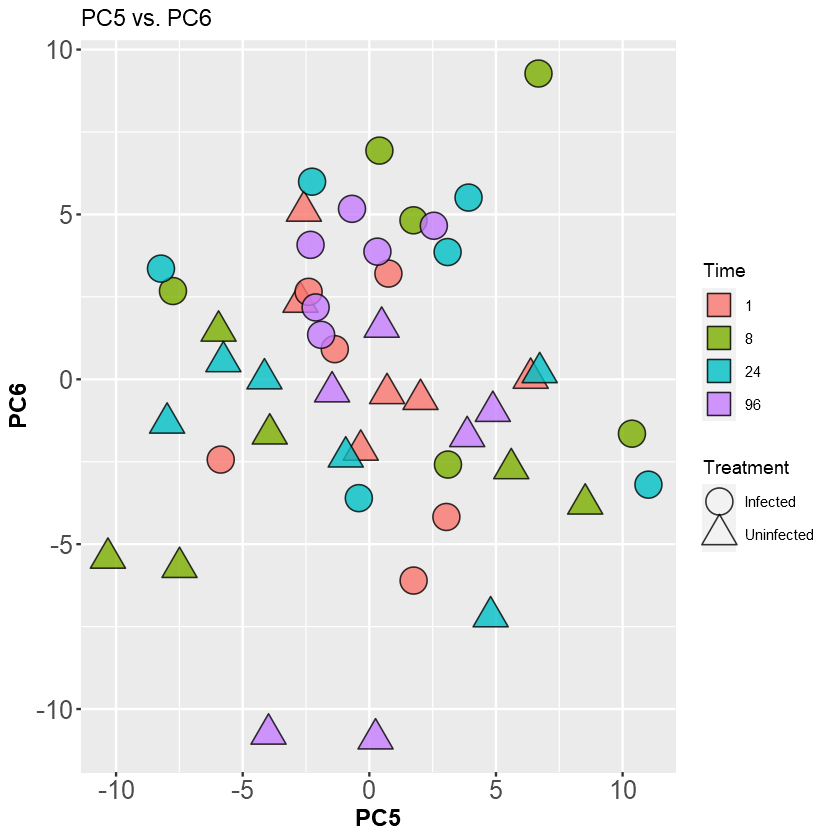

In [315]:
####################
# Editable section #
####################

# Set column of data frame to use for shape
shape_col <- 'Treatment'

## Shape list. You need one shape for every level of shape_colum. In the example we have 2 levels
## Link to shapes:
## https://blog.albertkuo.me/post/2019-03-24-point-shapes-in-ggplot_files/figure-html/unnamed-chunk-2-1.png
##  This code will only work well with "BOTH" shapes i.e. 21-25
Shape_list <- list(21, 24)

# Set column of data frame to use for fill color
fill_col <- 'Time'

# Set dot size- May need to lower size if you have lots of samples
dot_size <- 7

# plot_dpi
dpi <- 300

# width in Inches of final plot
width <- 6
# heigth in Inches of final plot
heigth <- 6

##########################
# Kinda editable section #
##########################


# The following code draws PCA's for the combination of your first 6 PC's (change at you own risk). 
# I do recommend chaning the title for each one. Ex. ggtitle("PC1 vs. PC2") --> ggtitle("changed title")

pca1 <- ggplot(df_pca) + 
        geom_point(aes(x=PC1, y=PC2, fill = !!ensym(fill_col), shape = !!ensym(shape_col)), colour="black", size=dot_size, alpha = 8/10) +
        scale_shape_manual(values=c(Shape_list)) +
        ggtitle("PC1 vs. PC2") +
        theme(axis.text.x=element_text(size=15)) +
        theme(axis.text.y=element_text(size=15)) +
        guides(fill = guide_legend(override.aes = list(shape=22))) +
        theme(axis.title=element_text(size=14,face="bold"))
pca2 <- ggplot(df_pca) + 
        geom_point(aes(x=PC2, y=PC3, fill = !!ensym(fill_col), shape = !!ensym(shape_col)), colour="black", size=dot_size, alpha = 8/10) +
        scale_shape_manual(values=c(Shape_list)) +
        ggtitle("PC2 vs. PC3") +
        theme(axis.text.x=element_text(size=15)) +
        theme(axis.text.y=element_text(size=15)) +
        guides(fill = guide_legend(override.aes = list(shape=22))) +
        theme(axis.title=element_text(size=14,face="bold"))
pca3 <- ggplot(df_pca) + 
        geom_point(aes(x=PC3, y=PC4, fill = !!ensym(fill_col), shape = !!ensym(shape_col)), colour="black", size=dot_size, alpha = 8/10) +
        scale_shape_manual(values=c(Shape_list)) +
        ggtitle("PC3 vs. PC4") +
        theme(axis.text.x=element_text(size=15)) +
        theme(axis.text.y=element_text(size=15)) +
        guides(fill = guide_legend(override.aes = list(shape=22))) +
        theme(axis.title=element_text(size=14,face="bold"))
pca4 <- ggplot(df_pca) + 
        geom_point(aes(x=PC4, y=PC5, fill = !!ensym(fill_col), shape = !!ensym(shape_col)), colour="black", size=dot_size, alpha = 8/10) +
        scale_shape_manual(values=c(Shape_list)) +
        ggtitle("PC4 vs. PC5") +
        theme(axis.text.x=element_text(size=15)) +
        theme(axis.text.y=element_text(size=15)) +
        guides(fill = guide_legend(override.aes = list(shape=22))) +
        theme(axis.title=element_text(size=14,face="bold"))
pca5 <- ggplot(df_pca) + 
        geom_point(aes(x=PC5, y=PC6, fill = !!ensym(fill_col), shape = !!ensym(shape_col)), colour="black", size=dot_size, alpha = 8/10) +
        scale_shape_manual(values=c(Shape_list)) +
        ggtitle("PC5 vs. PC6") +
        theme(axis.text.x=element_text(size=15)) +
        theme(axis.text.y=element_text(size=15)) +
        guides(fill = guide_legend(override.aes = list(shape=22))) +
        theme(axis.title=element_text(size=14,face="bold"))


###########################
# No reason to Edit below #
###########################


## Making output folder structure

if (!dir.exists("plots")){
  dir.create("plots")
}else{
  print("dir exists")
}

if (!dir.exists("plots/pcas")){
  dir.create("plots/pcas")
}else{
  print("dir exists")
}

## Drawing & Saving the plots

plot(pca1)
png("plots/pcas/PCA_1_2.png",width=width,height=heigth,units="in",res=dpi)
print(pca1)
dev.off()

plot(pca2)
png("plots/pcas/PCA_2_3.png",width=width,height=heigth,units="in",res=dpi)
print(pca2)
dev.off()

plot(pca3)
png("plots/pcas/PCA_3_4.png",width=width,height=heigth,units="in",res=dpi)
print(pca3)
dev.off()

plot(pca4)
png("plots/pcas/PCA_4_5.png",width=width,height=heigth,units="in",res=dpi)
print(pca4)
dev.off()

plot(pca5)
png("plots/pcas/PCA_5_6.png",width=width,height=heigth,units="in",res=dpi)
print(pca5)
dev.off()

In [316]:
### Extract the rlog matrix from the object
rld_mat <- assay(rld)    ## assay() is function from the "SummarizedExperiment" package that was loaded when you loaded DESeq2

In [317]:
### Compute pairwise correlation values
rld_cor <- cor(rld_mat)    ## corelation

head(rld_cor)   ## check the output of cor

,C_1_A,C_1_B,C_1_C,C_1_D,C_1_E,C_1_F,C_8_A,C_8_B,C_8_C,C_8_D,...,V_24_C,V_24_D,V_24_E,V_24_F,V_96_A,V_96_B,V_96_C,V_96_D,V_96_E,V_96_F
C_1_A,1.0000000,0.9981413,0.9982691,0.9981970,0.9981102,0.9981103,0.9954881,0.9957069,0.9952711,0.9954089,...,0.9900807,0.9899364,0.9905971,0.9904765,0.9809202,0.9799958,0.9806420,0.9803470,0.9811947,0.9807837
C_1_B,0.9981413,1.0000000,0.9983720,0.9981165,0.9981235,0.9980838,0.9955503,0.9957781,0.9954102,0.9954751,...,0.9902365,0.9900278,0.9907457,0.9905742,0.9808168,0.9799028,0.9805062,0.9803309,0.9811738,0.9807059
C_1_C,0.9982691,0.9983720,1.0000000,0.9983522,0.9983784,0.9983029,0.9956466,0.9957883,0.9955113,0.9955289,...,0.9902015,0.9899673,0.9907470,0.9905796,0.9804467,0.9796102,0.9802553,0.9800712,0.9808014,0.9803739
C_1_D,0.9981970,0.9981165,0.9983522,1.0000000,0.9982431,0.9982720,0.9955352,0.9957200,0.9953022,0.9954682,...,0.9899531,0.9898123,0.9905354,0.9904441,0.9803518,0.9794133,0.9800676,0.9798040,0.9806913,0.9802333
C_1_E,0.9981102,0.9981235,0.9983784,0.9982431,1.0000000,0.9982928,0.9953964,0.9955862,0.9951607,0.9952639,...,0.9899586,0.9897422,0.9906383,0.9905126,0.9804850,0.9797088,0.9803151,0.9800550,0.9808670,0.9804887
C_1_F,0.9981103,0.9980838,0.9983029,0.9982720,0.9982928,1.0000000,0.9955438,0.9957169,0.9953247,0.9954869,...,0.9903439,0.9901841,0.9908985,0.9908038,0.9811215,0.9802781,0.9809057,0.9806640,0.9814852,0.9811099


[1] "dir exists"


png 
  2

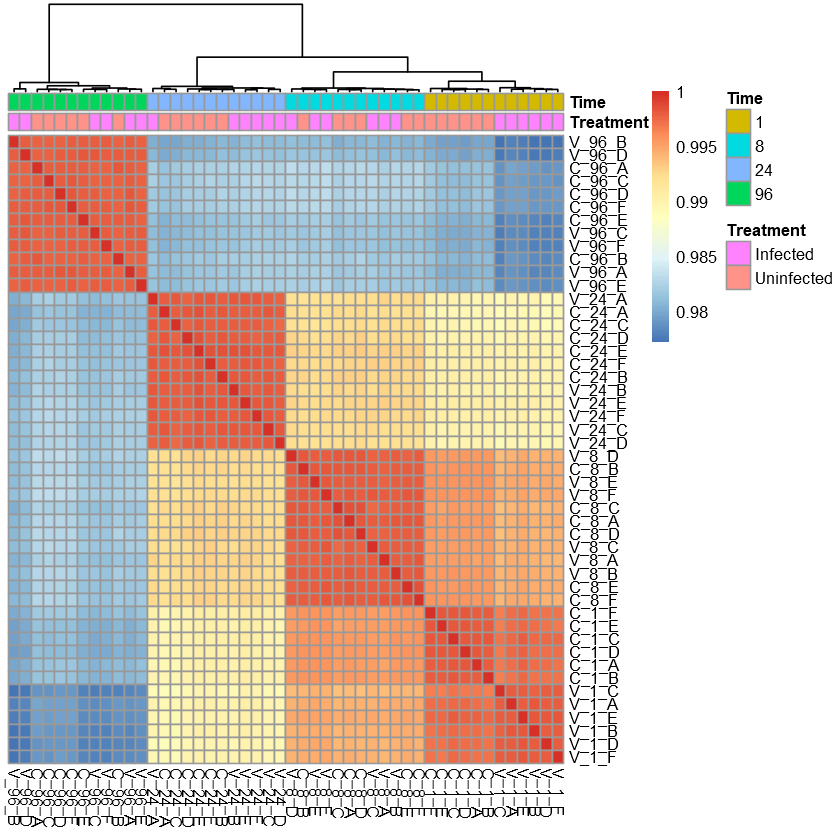

png 
  2

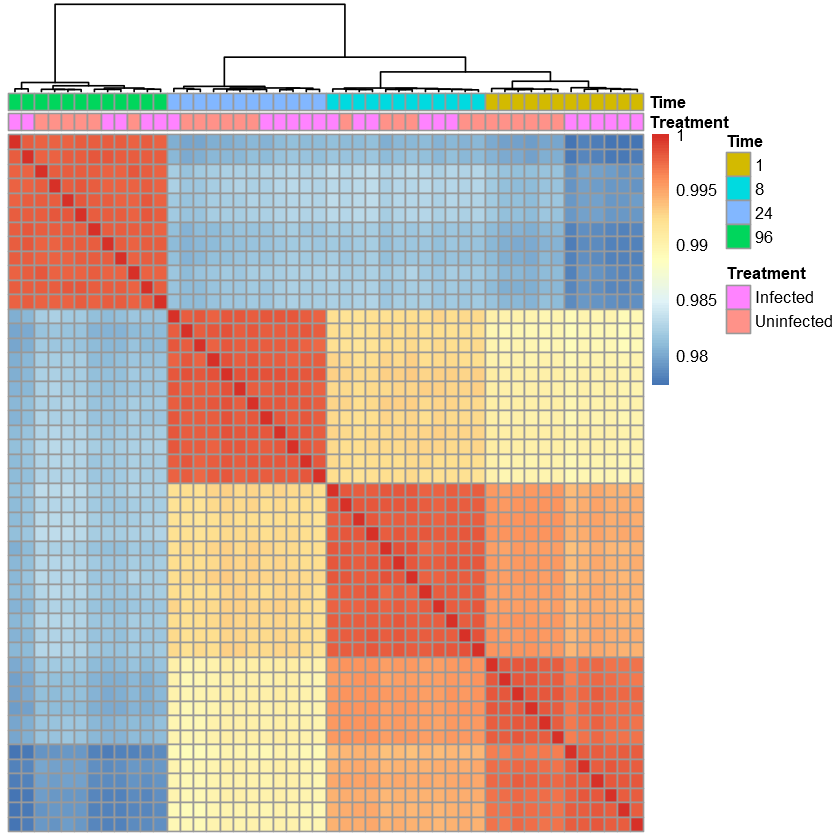

In [318]:
###Make meta df
meta <- as.data.frame(colData(dds)[,c("Treatment","Time")])



############################
# Change below at own risk #
############################


## make output folder structure

if (!dir.exists("plots/pretty_heatmap")){
  dir.create("plots/pretty_heatmap")
}else{
  print("dir exists")
}

##Function to save heatmap
save_pheatmap_png <- function(x, filename, width=1200, height=1000, res = 300) {
  png(filename, width = width, height = height, res = res)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}

### Plot heatmap & save

Names_Heatmap <- pheatmap(rld_cor, annotation = meta, show_rownames = TRUE, show_colnames = TRUE, treeheight_row = 0)
save_pheatmap_png(Names_Heatmap, "plots/pretty_heatmap/pretty_heatmap_with_samplenames.png")

NoNames_Heatmap <- pheatmap(rld_cor, annotation = meta, show_rownames = FALSE, show_colnames = FALSE, treeheight_row = 0)
save_pheatmap_png(NoNames_Heatmap, "plots/pretty_heatmap/pretty_heatmap_without_samplenames.png")

In [319]:
dds <- DESeq(dds)  ## Running DESeq

estimating size factors

using 'avgTxLength' from assays(dds), correcting for library size

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [320]:
## Total number of raw counts per sample
colSums(counts(dds))

C_1_A    C_1_B    C_1_C    C_1_D    C_1_E    C_1_F    C_8_A    C_8_B 
36055406 30446178 53806552 40477853 41892415 35113843 43966924 42490565 
   C_8_C    C_8_D    C_8_E    C_8_F   C_24_A   C_24_B   C_24_C   C_24_D 
50225755 44979520 38386529 44702168 40003875 42831251 39030598 32109636 
  C_24_E   C_24_F   C_96_A   C_96_B   C_96_C   C_96_D   C_96_E   C_96_F 
49968229 39001001 36680925 33524817 38435406 31432991 33741279 37315021 
   V_1_A    V_1_B    V_1_C    V_1_D    V_1_E    V_1_F    V_8_A    V_8_B 
45070930 38081505 36479058 43700443 50061276 38109419 34289698 32478084 
   V_8_C    V_8_D    V_8_E    V_8_F   V_24_A   V_24_B   V_24_C   V_24_D 
38089026 32647532 34524733 36862025 44793808 41951252 41413513 34456690 
  V_24_E   V_24_F   V_96_A   V_96_B   V_96_C   V_96_D   V_96_E   V_96_F 
42774843 35999234 40914371 37440735 32943516 38711099 33549261 31594934

In [321]:
## Total number of normalized counts per sample
colSums(counts(dds, normalized=T))

C_1_A    C_1_B    C_1_C    C_1_D    C_1_E    C_1_F    C_8_A    C_8_B 
41113885 41008971 40496791 40142190 39725312 40134902 38943455 39213477 
   C_8_C    C_8_D    C_8_E    C_8_F   C_24_A   C_24_B   C_24_C   C_24_D 
39817256 38989017 37635946 37549212 36360747 36770756 35192670 37017226 
  C_24_E   C_24_F   C_96_A   C_96_B   C_96_C   C_96_D   C_96_E   C_96_F 
36325273 35170714 39626223 40935484 38850225 39571201 39920121 39530407 
   V_1_A    V_1_B    V_1_C    V_1_D    V_1_E    V_1_F    V_8_A    V_8_B 
39779471 39355746 39586168 40061092 39429501 39815786 37494386 38096735 
   V_8_C    V_8_D    V_8_E    V_8_F   V_24_A   V_24_B   V_24_C   V_24_D 
38138176 39357054 38479682 38170947 34960976 36663099 36583668 37428299 
  V_24_E   V_24_F   V_96_A   V_96_B   V_96_C   V_96_D   V_96_E   V_96_F 
36119392 36152450 40401939 41069668 40301281 40736911 40943562 40784618

[1] "dir exists"


png 
  2

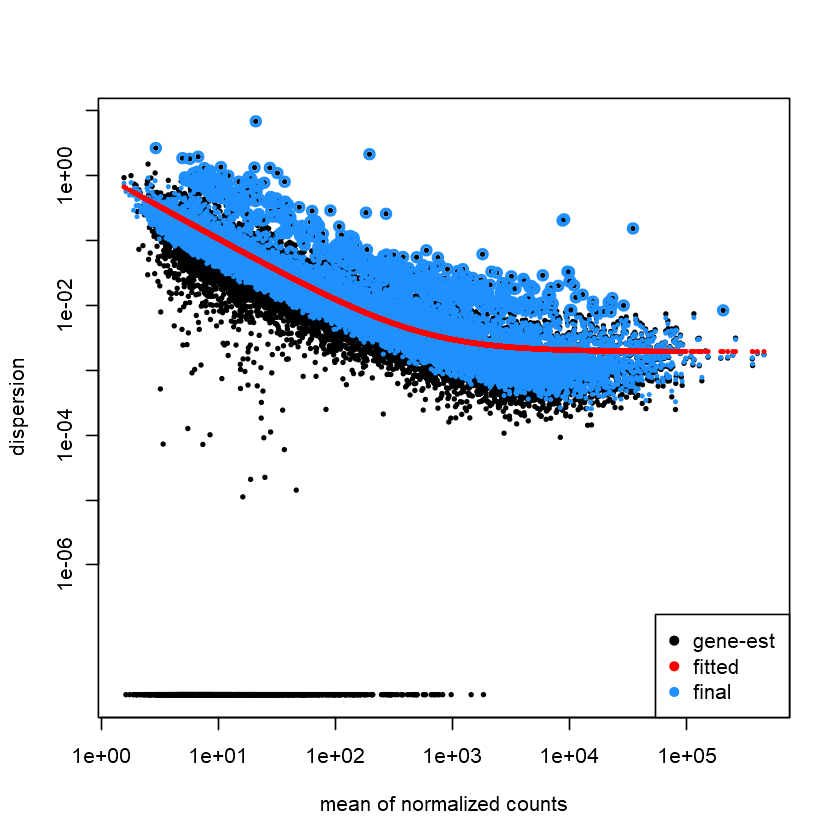

In [322]:
## Cange figure settings at own risk

## make output folder structure

if (!dir.exists("plots/dispersion_plot")){
  dir.create("plots/dispersion_plot")
}else{
  print("dir exists")
}

##Function to save dispersion plot
save_displot_png <- function(x, filename, width=1600, height=1400, res = 300) {
  png(filename, width = width, height = height, res = res)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}

## Plot dispersion estimates
plotDispEsts(dds)

## Saving dist plot
save_displot_png(plotDispEsts(dds), "plots/dispersion_plot/dispersion_plot.png")

In [323]:
####################################################
# Needs to be rewritten in loops for each contrast #
####################################################

# From here down we start working with indiviual contrasts from the model. Repeat each step for each of your contrasts
# In this example we have 4 contrasts, 1 for each timepoint Infected vs. Uninfected

In [324]:
resultsNames(dds)
#Here we can see deseq2 did not run the contrasts we are interested in, so we will specify them anyway

[1] "Intercept"                           
[2] "Trt_Time_Infected_24_vs_Infected_1"  
[3] "Trt_Time_Infected_8_vs_Infected_1"   
[4] "Trt_Time_Infected_96_vs_Infected_1"  
[5] "Trt_Time_Uninfected_1_vs_Infected_1" 
[6] "Trt_Time_Uninfected_24_vs_Infected_1"
[7] "Trt_Time_Uninfected_8_vs_Infected_1" 
[8] "Trt_Time_Uninfected_96_vs_Infected_1"

In [379]:
## Define contrasts

contrast_1 <- c("Trt_Time", "Infected_1", "Uninfected_1")
contrast_8 <- c("Trt_Time", "Infected_8", "Uninfected_8")
contrast_24 <- c("Trt_Time", "Infected_24", "Uninfected_24")
contrast_96 <- c("Trt_Time", "Infected_96", "Uninfected_96")

#Extract results table with a given alpha & Log2-Foldchange threshold 
#signifigant results with have a +/-log2FC & adj P-value > set values
#Remeber we are talking in terms of Log2(FC), so 0.58 = 1.5 Fold Change

## Setting values
padj.cutoff <- 0.05 ## Some studies use as high as 0.1 for adjusted p-value, with 0.05 being very common. Can be adjusted lower #sig genes very high
lfc.cutoff <- 0.58 ## Set to 0 if no lfc threshold is desired. To calc actual fold change (FC = 2^lfc)

res_table_1_58FC <- results(dds, contrast=contrast_1, alpha = padj.cutoff, lfcThreshold = lfc.cutoff)
res_table_8_58FC <- results(dds, contrast=contrast_8, alpha = padj.cutoff, lfcThreshold = lfc.cutoff)
res_table_24_58FC <- results(dds, contrast=contrast_24, alpha = padj.cutoff, lfcThreshold = lfc.cutoff)
res_table_96_58FC <- results(dds, contrast=contrast_96, alpha = padj.cutoff, lfcThreshold = lfc.cutoff)

In [391]:
## View a results table to make sure it looks correct
res_table_1_58FC %>% data.frame() %>% View()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TRINITY_DN0_c0_g1,4898.712104,0.210116016,0.02331269,0.0000000,1.00000000,1
TRINITY_DN0_c0_g2,9.299546,0.438524391,0.34326004,0.0000000,1.00000000,1
TRINITY_DN0_c1_g1,259.542125,-0.367983662,0.10516348,0.0000000,1.00000000,1
TRINITY_DN0_c10_g1,1446.017687,-0.166869963,0.03026031,0.0000000,1.00000000,1
TRINITY_DN0_c11_g1,6.576095,0.753797609,0.41938029,0.4144153,0.67856998,1
TRINITY_DN0_c142_g1,84.534552,0.196676960,0.12715418,0.0000000,1.00000000,1
TRINITY_DN0_c15_g1,71.669703,0.011562284,0.14955774,0.0000000,1.00000000,1
TRINITY_DN0_c2_g1,5.545240,-1.530496463,0.48734815,-1.9503439,0.05113515,1
TRINITY_DN0_c20_g1,35.304042,0.537921960,0.20142297,0.0000000,1.00000000,1


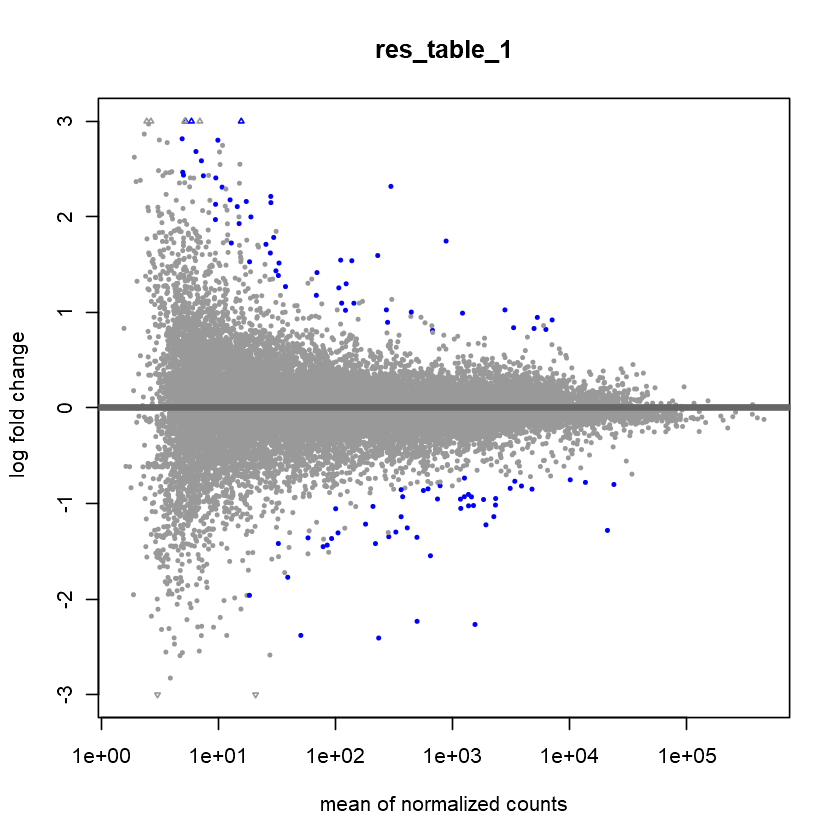

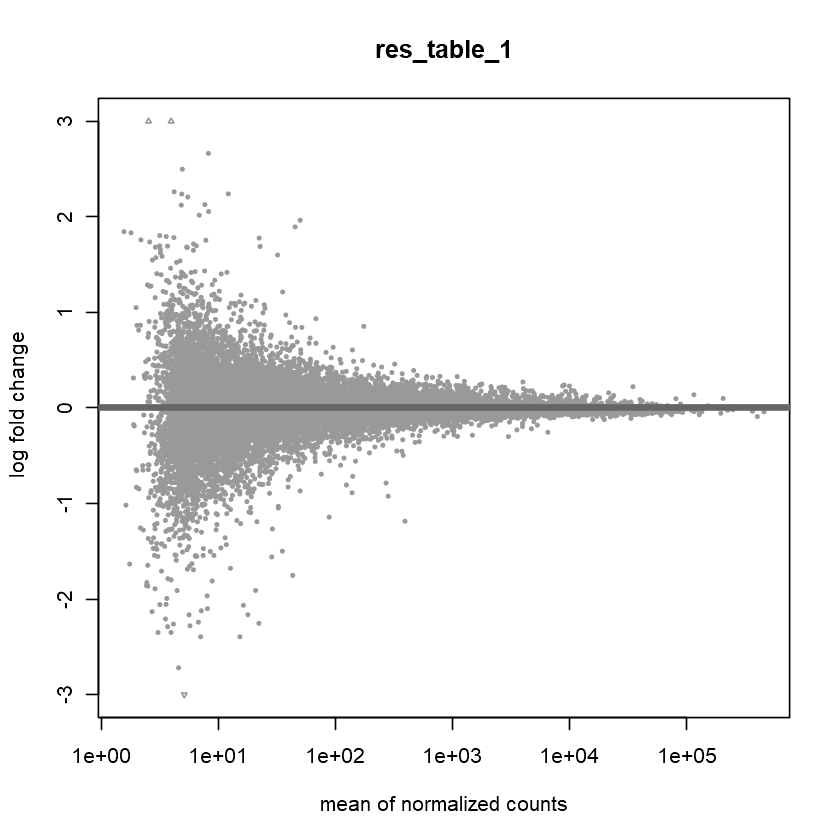

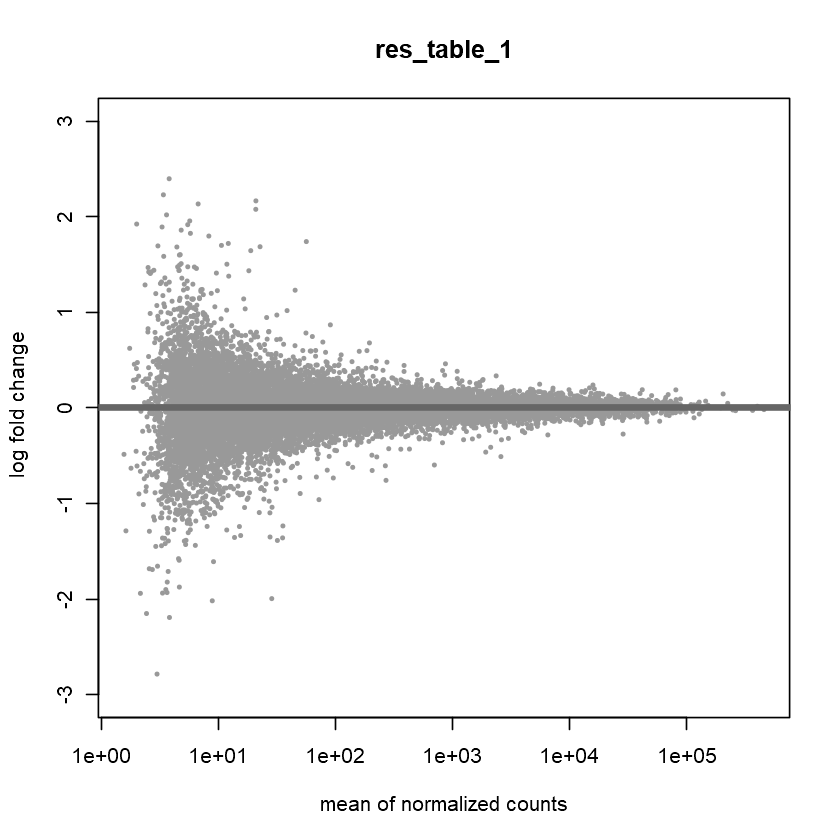

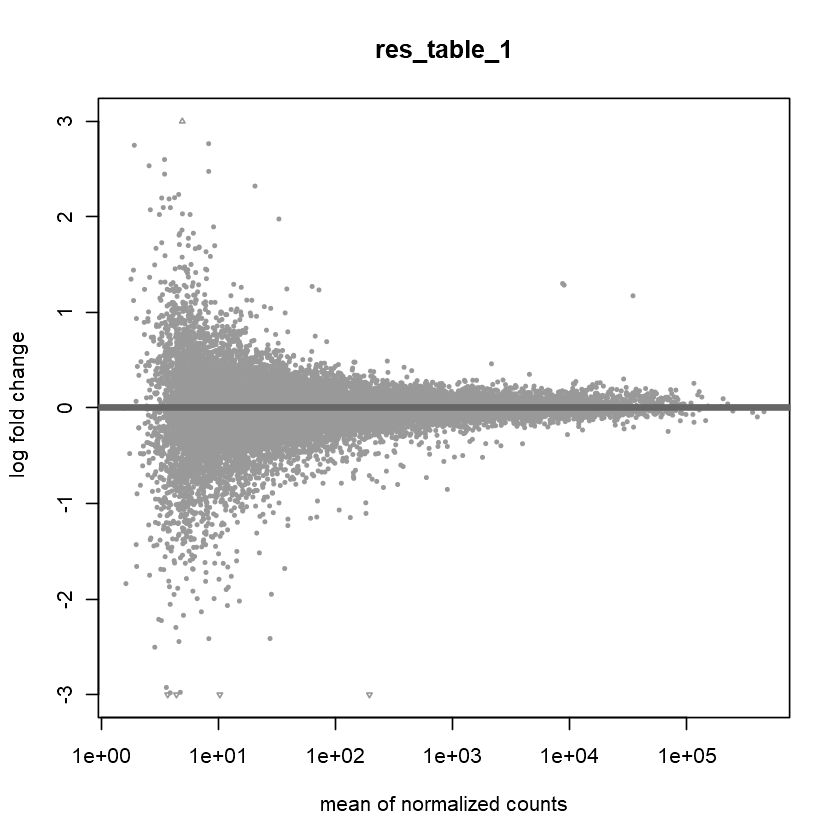

In [386]:
#plotting significantly differentially expressed genes (in blue)
plotMA(res_table_1_58FC, ylim=c(-3,3), main='res_table_1')
plotMA(res_table_8_58FC, ylim=c(-3,3), main='res_table_1')
plotMA(res_table_24_58FC, ylim=c(-3,3), main='res_table_1')
plotMA(res_table_96_58FC, ylim=c(-3,3), main='res_table_1')

In [387]:
print('summary of res_table_1')
summary(res_table_1_58FC, alpha = 0.05)
print('summary of res_table_8')
summary(res_table_8_58FC, alpha = 0.05)
print('summary of res_table_24')
summary(res_table_24_58FC, alpha = 0.05)
print('summary of res_table_96')
summary(res_table_96_58FC, alpha = 0.05)

[1] "summary of res_table_1"

out of 17779 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.58 (up)    : 53, 0.3%
LFC < -0.58 (down) : 49, 0.28%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

[1] "summary of res_table_8"

out of 17779 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.58 (up)    : 0, 0%
LFC < -0.58 (down) : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

[1] "summary of res_table_24"

out of 17779 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.58 (up)    : 0, 0%
LFC < -0.58 (down) : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

[1] "summary of res_table_96"

out of 

In [388]:
## Creating tables of only signficiant results

# table 1-hour
res_table_1_tb <- res_table_1_58FC %>%
  data.frame() %>%
  rownames_to_column(var="gene") %>% 
  as_tibble()

sig_res_1_pval <- filter(res_table_1_tb, padj < padj.cutoff)

# table 8-hour
res_table_8_tb <- res_table_8_58FC %>%
  data.frame() %>%
  rownames_to_column(var="gene") %>% 
  as_tibble()

sig_res_8_pval <- filter(res_table_8_tb, padj < padj.cutoff)

# talbe 24-hour
res_table_24_tb <- res_table_24_58FC %>%
  data.frame() %>%
  rownames_to_column(var="gene") %>% 
  as_tibble()

sig_res_24_pval <- filter(res_table_24_tb, padj < padj.cutoff)

# table 96-hour
res_table_96_tb <- res_table_96_58FC %>%
  data.frame() %>%
  rownames_to_column(var="gene") %>% 
  as_tibble()

sig_res_96_pval <- filter(res_table_96_tb, padj < padj.cutoff, abs(log2FoldChange) >= lfc.cutoff)

In [389]:
print("Number Significant reults abouve 1.5FC at Time 1")
nrow(sig_res_1_pval)
print("Number Significant reults abouve 1.5FC at Time 8")
nrow(sig_res_8_pval)
print("Number Significant reults abouve 1.5FC at Time 24")
nrow(sig_res_24_pval)
print("Number Significant reults abouve 1.5FC at Time 96")
nrow(sig_res_96_pval)

[1] "Number Significant reults abouve 1.5FC at Time 1"


[1] 102

[1] "Number Significant reults abouve 1.5FC at Time 8"


[1] 0

[1] "Number Significant reults abouve 1.5FC at Time 24"


[1] 0

[1] "Number Significant reults abouve 1.5FC at Time 96"


[1] 0

In [331]:
# Obtain rlog values for those significant genes
cluster_rlog <- rld_mat[sig_res_1_pval$gene, ]

# Typically we would do this for every contrast, but in this example later timepoints have 0 differential expression
#cluster_rlog <- rld_mat[sig_res_8_pval$gene, ]
#cluster_rlog <- rld_mat[sig_res_24_pval$gene, ]
#cluster_rlog <- rld_mat[sig_res_96_pval$gene, ]

Working with 102 genes.

Working with 43 genes after filtering: minc > 15

Joining with `by = join_by(merge)`
Joining with `by = join_by(merge)`


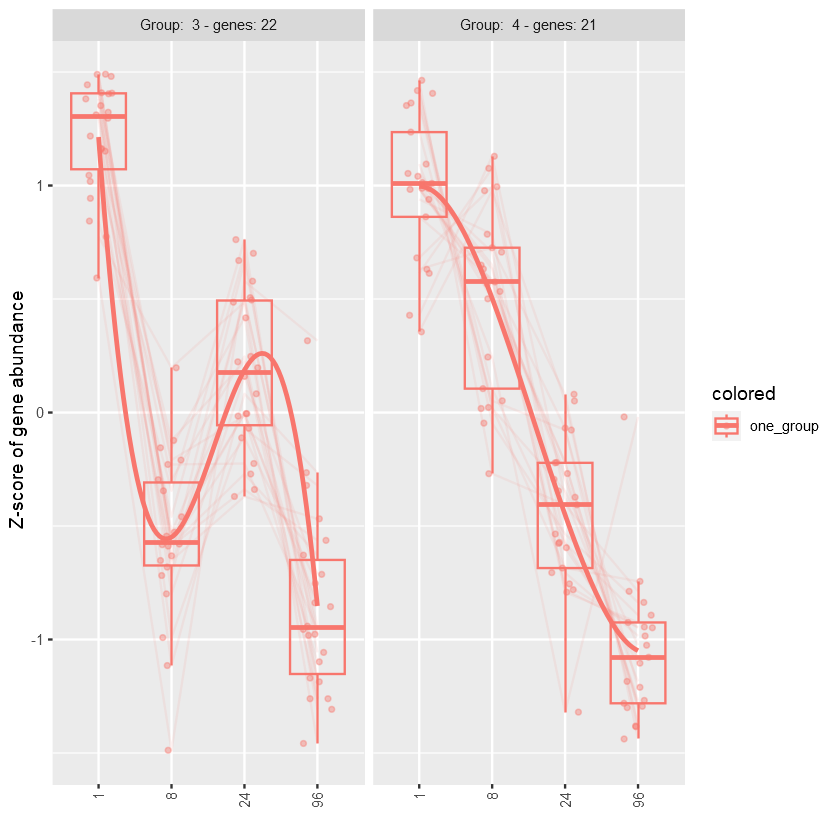

In [332]:
# Use the `degPatterns` function from the 'DEGreport' package to show gene clusters across sample groups
clusters <- degPatterns(cluster_rlog, metadata = meta, time = "Time", col=NULL)

In [333]:
# outputting plot

## make output folder structure

if (!dir.exists("plots/clust_map")){
  dir.create("plots/clust_map")
}else{
  print("dir exists")
}


## writing to file
## Will probably need to play with width and height dependent on how many clusters come out

width <- 8
heigth <- 10
dpi <- 300

png("plots/clust_map/clustmap.png",width=width,height=heigth,units="in",res=dpi)
print(clusters$plot)
dev.off()

[1] "dir exists"


png 
  2

In [334]:
cluster_df <- clusters$df

In [390]:
##Outputting data

## make output folder structure

if (!dir.exists("deseq2_results")){
  dir.create("deseq2_results")
}else{
  print("dir exists")
}

if (!dir.exists("deseq2_results/sig_results")){
  dir.create("deseq2_results/sig_results")
}else{
  print("dir exists")
}

if (!dir.exists("deseq2_results/results")){
  dir.create("deseq2_results/results")
}else{
  print("dir exists")
}

if (!dir.exists("deseq2_results/norm_counts")){
  dir.create("deseq2_results/norm_counts")
}else{
  print("dir exists")
}

if (!dir.exists("deseq2_results/cluster_profile")){
  dir.create("deseq2_results/cluster_profile")
}else{
  print("dir exists")
}

##Significant results (0.05 & 0.58lfc)
write.csv(sig_res_1_pval, "deseq2_results/sig_results/sig_result_timepoint_1.csv")
write.csv(sig_res_8_pval, "deseq2_results/sig_results/sig_result_timepoint_8.csv")
write.csv(sig_res_24_pval, "deseq2_results/sig_results/sig_result_timepoint_24.csv")
write.csv(sig_res_96_pval, "deseq2_results/sig_results/sig_result_timepoint_96.csv")

## Full results
write.csv(res_table_1_58FC, "deseq2_results/results/result_timepoint_1.csv")
write.csv(res_table_8_58FC, "deseq2_results/results/result_timepoint_8.csv")
write.csv(res_table_24_58FC, "deseq2_results/results/result_timepoint_24.csv")
write.csv(res_table_96, "deseq2_results/results/result_timepoint_96.csv")

## Normalized Count Data - avgTxLength (median of rations- ONlY FOR INTER-SAMPLE GENE COMPARSION, NOT SUTABLE FOR INTRA-SAMPLES GENE COMPARISION) 
write.csv(assays(dds)[["avgTxLength"]], "deseq2_results/norm_counts/Normalized_Counts_avgTxLength.csv")


## Clusters
write.csv(cluster_df, "deseq2_results/cluster_profile/cluster_profile.csv", row.names=FALSE)

[1] "dir exists"
[1] "dir exists"
[1] "dir exists"
[1] "dir exists"
[1] "dir exists"
